In [1]:
#install Seaborn package. Comment after running once.
!pip install seaborn
!pip install statsmodels
!pip install -q datascience                                       
!pip install -q pandas-profiling
print('Installed...')

Installed...


In [2]:
# Import Dependencies
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import math
import warnings
from sklearn.linear_model import LinearRegression  
from sklearn import metrics
import seaborn as sns                                             
%matplotlib inline
sns.set()
import datetime
from subprocess import check_output
import scipy as sp 
from scipy import stats
from scipy.stats import norm

In [3]:
# 2. Load data
concrete_train = pd.DataFrame(pd.read_csv('concrete_train.csv',index_col = 0))        # Air Quality data for training is loaded
concrete_test = pd.DataFrame(pd.read_csv('concrete_test.csv',index_col = 0 ) )   # Air Quality data for testing is loaded

In [4]:
# 3. Check the head of the train data (first few rows)
concrete_train.head()
# 3. Check the head of the test data (first few rows)
concrete_test.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
Id,,,,,,,,
31,266.0,114.0,0.0,228.0,0.0,932.0,670.0,365
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7
136,389.9,189.0,0.0,145.9,22.0,944.7,755.8,28
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3
918,145.0,0.0,179.0,202.0,8.0,824.0,869.0,28


In [5]:
# 4. Check for missing values
print(concrete_train.isnull().sum())
print(concrete_test.isnull().any())
print(concrete_train.shape)
print(concrete_test.shape)

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64
cement              False
slag                False
flyash              False
water               False
superplasticizer    False
coarseaggregate     False
fineaggregate       False
age                 False
dtype: bool
(824, 9)
(206, 8)


In [6]:
# 5. Summary Statistics
concrete_train.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000
mean,283.360801,74.371602,53.160801,181.797087,6.163956,973.548544,772.107403,44.661408,35.857864
std,107.536404,86.977784,64.000646,21.321905,5.967258,78.694630,80.984717,60.475702,16.865099
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.000000,0.000000,0.000000,164.900000,0.000000,932.000000,726.775000,12.250000,23.685000
50%,275.100000,22.000000,0.000000,185.350000,6.100000,968.000000,778.500000,28.000000,34.080000
75%,359.900000,144.775000,118.300000,192.000000,10.125000,1040.600000,821.250000,56.000000,45.862500
max,540.000000,359.400000,195.000000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


**Observations**
- Slag, flyash and superplasticizer have zero values in this receipe of concrete, the superplasticizer is the important parameter
- slag seems to be having a max 359 in receipes and contributor to compressive strength
- fly ash 195 with median value of zero, think it can be dropped
- superplasticizer with 0-32

In [7]:
# 5. Summary Statistics
concrete_test.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
count,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000
mean,272.396117,71.992718,58.298544,180.648058,6.367476,970.400485,779.472816,49.665049
std,91.097824,83.606678,63.972677,21.510510,6.011920,74.002555,76.763794,72.987399
min,116.000000,0.000000,0.000000,126.600000,0.000000,801.100000,594.000000,3.000000
25%,198.600000,0.000000,0.000000,164.000000,0.000000,932.000000,739.600000,7.000000
50%,263.950000,22.000000,0.000000,184.500000,7.000000,968.000000,781.100000,28.000000
75%,332.125000,140.725000,118.300000,193.000000,10.400000,1012.400000,829.500000,56.000000
max,540.000000,342.100000,200.100000,228.000000,32.200000,1125.000000,992.600000,365.000000


In [8]:
# 4. Check for info
concrete_train.info(verbose = True, memory_usage = 'deep', show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824 entries, 995 to 860
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            824 non-null    float64
 1   slag              824 non-null    float64
 2   flyash            824 non-null    float64
 3   water             824 non-null    float64
 4   superplasticizer  824 non-null    float64
 5   coarseaggregate   824 non-null    float64
 6   fineaggregate     824 non-null    float64
 7   age               824 non-null    int64  
 8   csMPa             824 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 64.4 KB


In [9]:
concrete_train = concrete_train.replace(0,np.nan, regex=True, inplace = False)

In [10]:
print(concrete_train.isnull().sum())

cement                0
slag                377
flyash              461
water                 0
superplasticizer    304
coarseaggregate       0
fineaggregate         0
age                   0
csMPa                 0
dtype: int64


In [11]:
#filling in NaN values
concrete_train['superplasticizer']  = concrete_train['superplasticizer'].fillna(value=concrete_train['superplasticizer'].mean())

In [12]:
#filling in NaN values

concrete_train["slag"].fillna(concrete_train.groupby("age")["slag"].transform("mean"), inplace=True)
concrete_train["flyash"].fillna(concrete_train.groupby('age')["flyash"].transform("mean") ,inplace=True)

In [13]:
#ReSet Index, REF_NO
#concrete_train.reset_index(inplace=True,drop=True)
concrete_train.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
Id,,,,,,,,,
995,158.6,148.90000,116.0,175.1,15.0,953.3,719.7,28,27.68
507,424.0,22.00000,132.0,178.0,8.5,822.0,750.0,28,62.05
334,275.1,115.69661,121.4,159.5,9.9,1053.6,777.5,3,23.80
848,252.0,97.00000,76.0,194.0,8.0,835.0,821.0,28,33.40
294,168.9,42.20000,124.3,158.3,10.8,1080.8,796.2,3,7.40


In [14]:
#displaying rows that contain zeros more than once,(df == 0).sum(1) counts how many zeroes are there in rows and sums
#if filter is <2 then it will include rows which have null zeroes /sum of 1 zero, which is below 2
concrete_train[(concrete_train == 0).sum(1) < 2]

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
Id,,,,,,,,,
995,158.6,148.900000,116.000000,175.1,15.0,953.3,719.7,28,27.68
507,424.0,22.000000,132.000000,178.0,8.5,822.0,750.0,28,62.05
334,275.1,115.696610,121.400000,159.5,9.9,1053.6,777.5,3,23.80
848,252.0,97.000000,76.000000,194.0,8.0,835.0,821.0,28,33.40
294,168.9,42.200000,124.300000,158.3,10.8,1080.8,796.2,3,7.40
...,...,...,...,...,...,...,...,...,...
87,286.3,200.900000,118.024561,144.7,11.2,1004.6,803.7,3,24.40
330,246.8,86.025000,125.100000,143.3,12.0,1086.8,800.9,14,42.22
466,190.3,85.116667,125.200000,166.6,9.9,1079.0,798.9,100,33.56


In [15]:
#displaying rows that contain zeros in more than two columns.
concrete_train[(concrete_train == 0).sum(1) < 3]

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
Id,,,,,,,,,
995,158.6,148.900000,116.000000,175.1,15.0,953.3,719.7,28,27.68
507,424.0,22.000000,132.000000,178.0,8.5,822.0,750.0,28,62.05
334,275.1,115.696610,121.400000,159.5,9.9,1053.6,777.5,3,23.80
848,252.0,97.000000,76.000000,194.0,8.0,835.0,821.0,28,33.40
294,168.9,42.200000,124.300000,158.3,10.8,1080.8,796.2,3,7.40
...,...,...,...,...,...,...,...,...,...
87,286.3,200.900000,118.024561,144.7,11.2,1004.6,803.7,3,24.40
330,246.8,86.025000,125.100000,143.3,12.0,1086.8,800.9,14,42.22
466,190.3,85.116667,125.200000,166.6,9.9,1079.0,798.9,100,33.56


In [16]:
#checking after filling NaN
print(" \nCount total NaN at each column in a DataFrame : \n\n",
concrete_train.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 cement                0
slag                  5
flyash              113
water                 0
superplasticizer      0
coarseaggregate       0
fineaggregate         0
age                   0
csMPa                 0
dtype: int64


In [17]:
concrete_train.dropna(subset=['slag', 'flyash'],inplace=True)

In [18]:
concrete_train.isnull().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [19]:
concrete_train.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000
mean,276.098594,131.545684,120.506066,179.360338,9.634659,974.994655,776.556540,27.234880,34.182504
std,105.723216,57.743114,24.299866,19.798684,3.756278,80.220027,74.980346,23.056201,16.519748
min,102.000000,11.000000,24.500000,121.800000,1.700000,801.000000,594.000000,3.000000,2.330000
25%,190.150000,98.100000,114.700000,164.800000,7.800000,931.250000,742.500000,7.000000,22.055000
50%,252.000000,145.000000,121.600000,181.700000,9.767500,970.000000,779.300000,28.000000,32.850000
75%,349.500000,150.745455,124.029070,192.000000,10.400000,1043.600000,820.500000,28.000000,44.135000
max,540.000000,359.400000,195.000000,247.000000,32.200000,1145.000000,992.600000,100.000000,81.750000


In [20]:
concrete_test.info(verbose = True, memory_usage = 'deep', show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206 entries, 31 to 602
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            206 non-null    float64
 1   slag              206 non-null    float64
 2   flyash            206 non-null    float64
 3   water             206 non-null    float64
 4   superplasticizer  206 non-null    float64
 5   coarseaggregate   206 non-null    float64
 6   fineaggregate     206 non-null    float64
 7   age               206 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 14.5 KB


In [21]:
#6. to understand skew in all variables and see if y variable has a normal distribution
#Which feature in the dataset is normally distributed?
print(concrete_train.skew())
print(concrete_test.skew())

cement              0.591122
slag                0.378622
flyash             -0.414603
water               0.006289
superplasticizer    2.023411
coarseaggregate    -0.154102
fineaggregate      -0.178956
age                 1.646585
csMPa               0.533729
dtype: float64
cement              0.493967
slag                0.793745
flyash              0.429995
water               0.008981
superplasticizer    0.951515
coarseaggregate    -0.048132
fineaggregate      -0.291924
age                 2.997094
dtype: float64


In [22]:
concrete_train.drop_duplicates()
concrete_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 711 entries, 995 to 860
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            711 non-null    float64
 1   slag              711 non-null    float64
 2   flyash            711 non-null    float64
 3   water             711 non-null    float64
 4   superplasticizer  711 non-null    float64
 5   coarseaggregate   711 non-null    float64
 6   fineaggregate     711 non-null    float64
 7   age               711 non-null    int64  
 8   csMPa             711 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 55.5 KB


<AxesSubplot:>

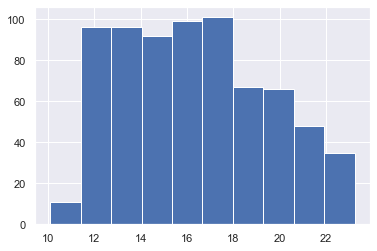

In [23]:
#7. understand dash, question mark or unique values etc Univariate/Features
np.sqrt(concrete_train['cement']).hist() #to check dash, question mark etc

<AxesSubplot:>

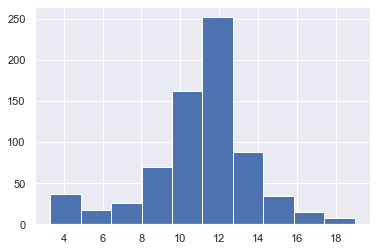

In [24]:
#7. understand dash, question mark or unique values etc Univariate/Features
np.sqrt(concrete_train['slag']).hist() #to check dash, question mark etc

<AxesSubplot:>

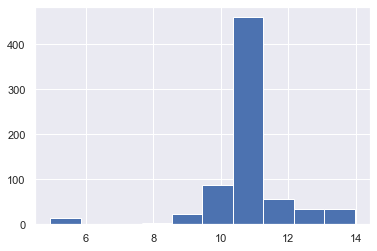

In [25]:
#8. understand Univariate/Features
np.sqrt(concrete_train['flyash']).hist()

<AxesSubplot:>

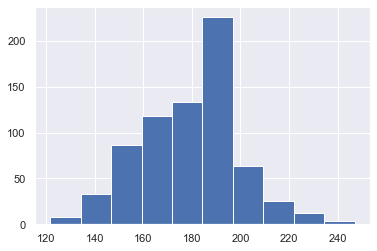

In [26]:
#8. understand Univariate/Features
concrete_train['water'].hist()

In [27]:
concrete_train['superplasticizer'].value_counts()

9.7675     211
11.6000     24
8.0000      17
7.0000      14
9.0000      13
          ... 
8.4000       1
6.2000       1
16.1000      1
3.1000       1
10.6000      1
Name: superplasticizer, Length: 105, dtype: int64

In [28]:
concrete_train['flyash'].value_counts()

124.029070    178
114.700000     84
118.024561     53
118.334000     22
118.300000     15
             ... 
76.000000       1
103.000000      1
146.400000      1
92.000000       1
89.600000       1
Name: flyash, Length: 135, dtype: int64

In [29]:
concrete_train['slag'].value_counts()

148.326087    143
115.696610     51
150.745455     39
86.025000      38
103.353488     29
             ... 
148.900000      1
98.800000       1
17.200000       1
243.500000      1
119.000000      1
Name: slag, Length: 169, dtype: int64

**Observation**
- slag, flyash,super plasticizer has zero values
- slag-46% zeroes
- flyash-55%
- superplasticizer-36% Zero values

In [30]:
# importing sweetviz
import sweetviz as sv

In [31]:
#analyzing the dataset
concrete_train_report = sv.analyze(concrete_train)
#display the report
concrete_train_report.show_html('concrete_train.html')

                                             |                                             | [  0%]   00:00 ->…

Report concrete_train.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<AxesSubplot:>

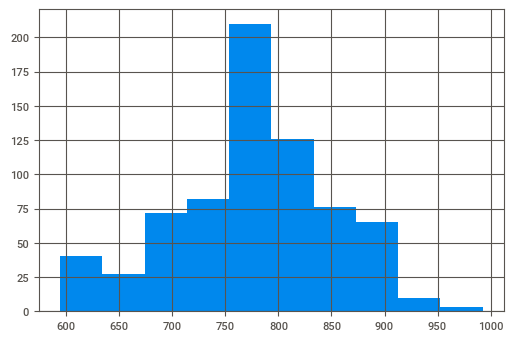

In [32]:
#8. understand Univariate/Features
concrete_train['fineaggregate'].hist()

<AxesSubplot:>

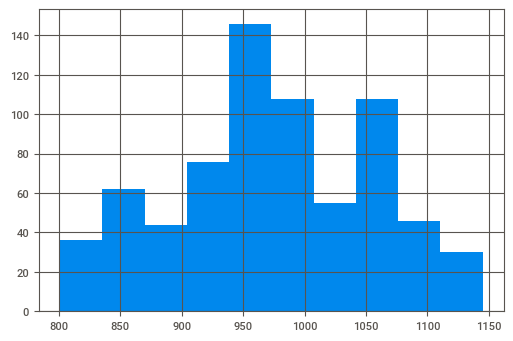

In [33]:
#8. understand Univariate/Features
concrete_train['coarseaggregate'].hist()

In [34]:
#FEATURE ENGINEERING
# FA/CA ratio TO COMPRESSIVE STRENGTH
concrete_train['FA/CA ratio'] = concrete_train['fineaggregate']/concrete_train['coarseaggregate']
concrete_test['FA/CA ratio'] = concrete_test['fineaggregate']/concrete_test['coarseaggregate']


<AxesSubplot:>

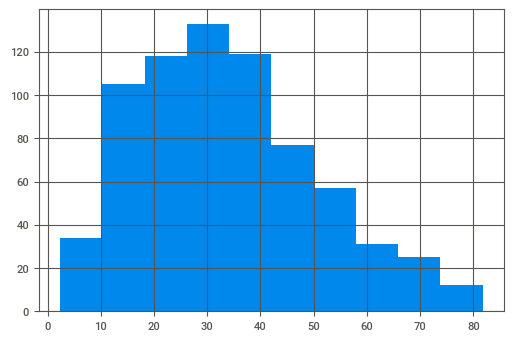

In [35]:
#8. understand Univariate/Features
concrete_train['csMPa'].hist()

<AxesSubplot:>

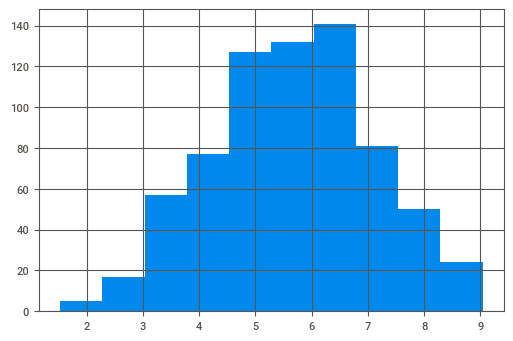

In [36]:
#8. understand Univariate/Features
np.sqrt(concrete_train['csMPa']).hist()

<AxesSubplot:>

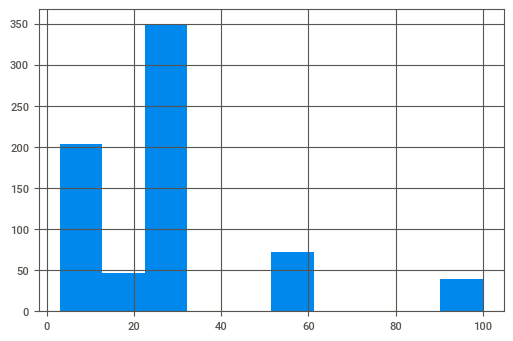

In [37]:
#9. Visualize Univariate
concrete_train['age'].hist()

<AxesSubplot:>

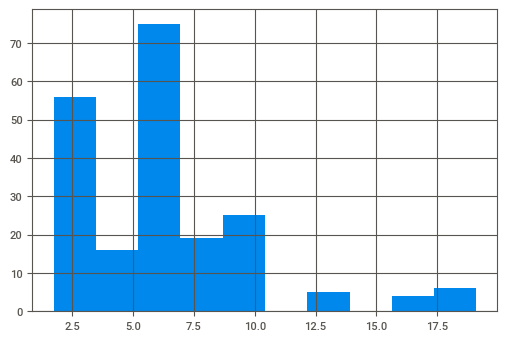

In [38]:
#10. LR Assumption, TV normally distributed 
np.sqrt(concrete_test['age']).hist()

<AxesSubplot:>

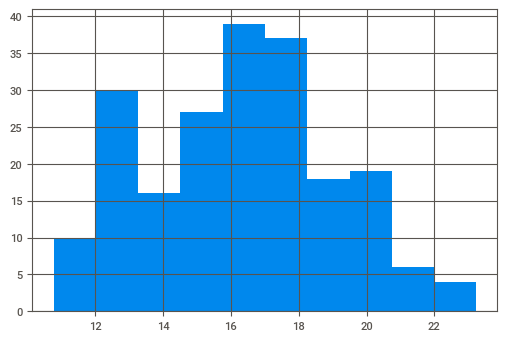

In [39]:
#11. if not log transform and check
np.sqrt(concrete_test['cement']).hist()

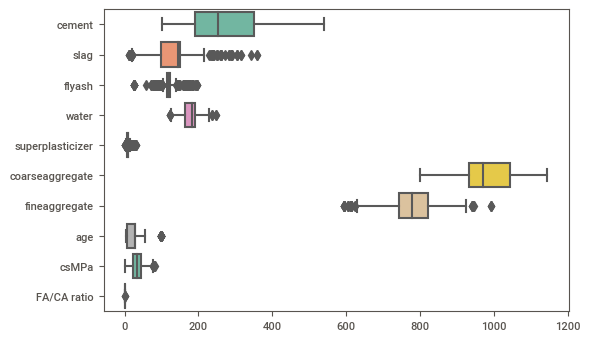

In [40]:
#boxplot to check the distribution of data
def lr():
    import seaborn as sns
    sns.boxplot(data=concrete_train, orient="h", palette="Set2")
    return None 
lr()

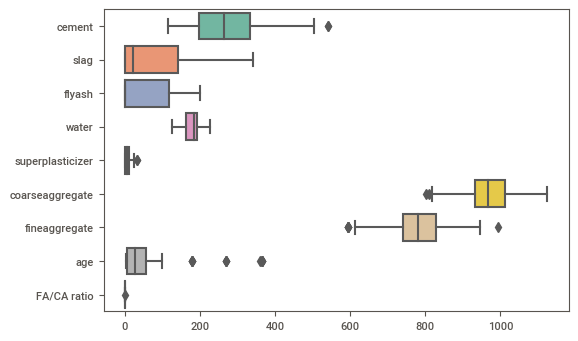

In [41]:
#boxplot to check the distribution of data
def lr():
    import seaborn as sns
    sns.boxplot(data=concrete_test, orient="h", palette="Set2")
    return None 
lr()

**Observations**
- looks like age has outliers

In [42]:
#outlier removal, upto Z score=3std
import pandas as pd
def lr(concrete_train):
    
    Q1 = concrete_train.quantile(0.05)
    Q3 = concrete_train.quantile(0.95)
    Q_diff = Q3 - Q1
    concrete_out = concrete_train[~((concrete_train < (Q1 - Q_diff))|(concrete_train > (Q3 + Q_diff))).any(axis=1)]
    print(concrete_train[((concrete_train < (Q1 - Q_diff))|(concrete_train > (Q3 + Q_diff))).any(axis=1)])
    return concrete_out
lr(concrete_train)
concrete_train=lr(concrete_train)


     cement        slag      flyash  water  superplasticizer  coarseaggregate  \
Id                                                                              
79    531.3  115.696610  118.024561  141.8              28.2            852.1   
148   531.3  103.353488  118.334000  141.8              28.2            852.1   
125   531.3  148.326087  124.029070  141.8              28.2            852.1   
145   469.0  117.200000  118.334000  137.8              32.2            852.1   
99    469.0  117.200000  114.700000  137.8              32.2            852.1   
102   531.3  150.745455  114.700000  141.8              28.2            852.1   
122   469.0  117.200000  124.029070  137.8              32.2            852.1   

     fineaggregate  age  csMPa  FA/CA ratio  
Id                                           
79           893.7    3   41.3     1.048821  
148          893.7   56   58.8     1.048821  
125          893.7   28   56.4     1.048821  
145          840.5   56   69.3     0.986

In [43]:
print(concrete_train.shape)
print(concrete_test.shape)

(704, 10)
(206, 9)


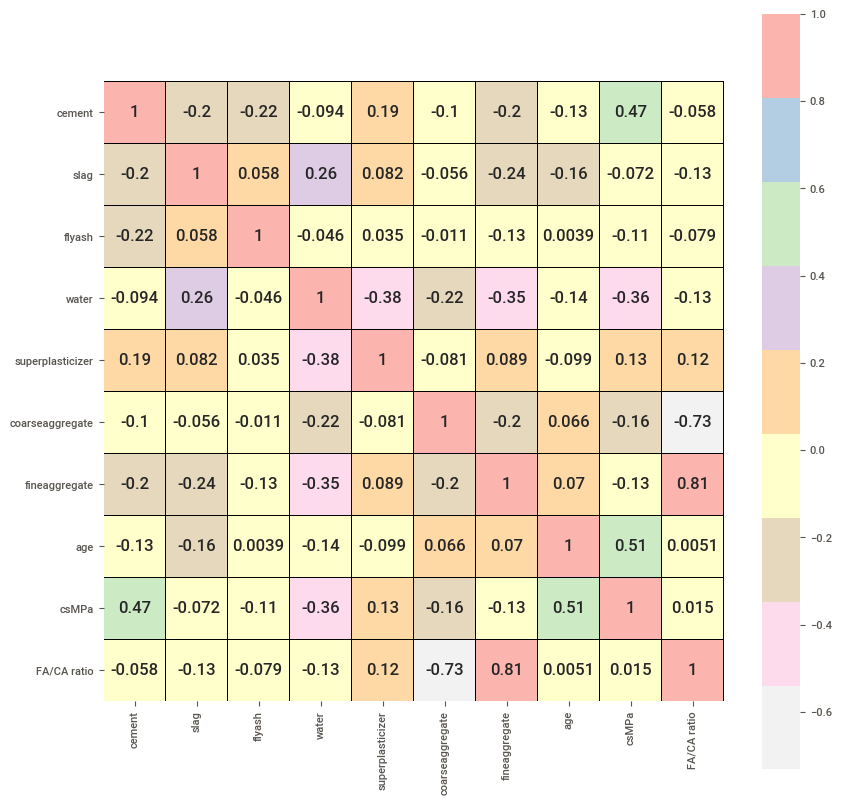

In [44]:
# Generate a heat map
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(concrete_train.corr(), annot=True,cmap='Pastel1_r',linewidths=0.5, linecolor='black',square=True, ax=ax );


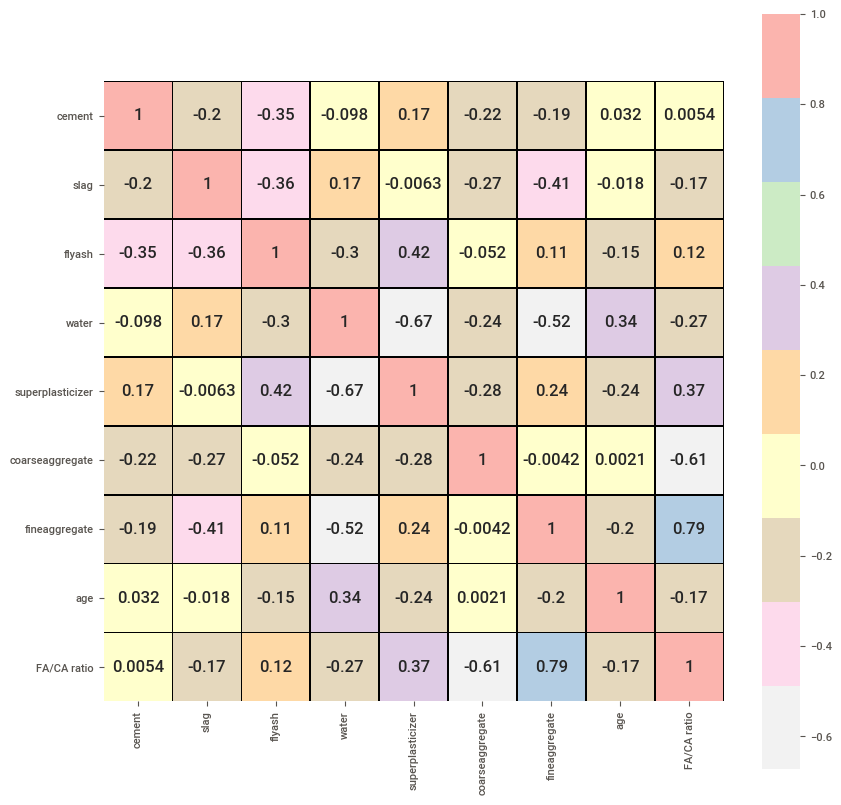

In [45]:
# Generate a heat map
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(concrete_test.corr(), annot=True,cmap='Pastel1_r',linewidths=0.5, linecolor='black',square=True, ax=ax );


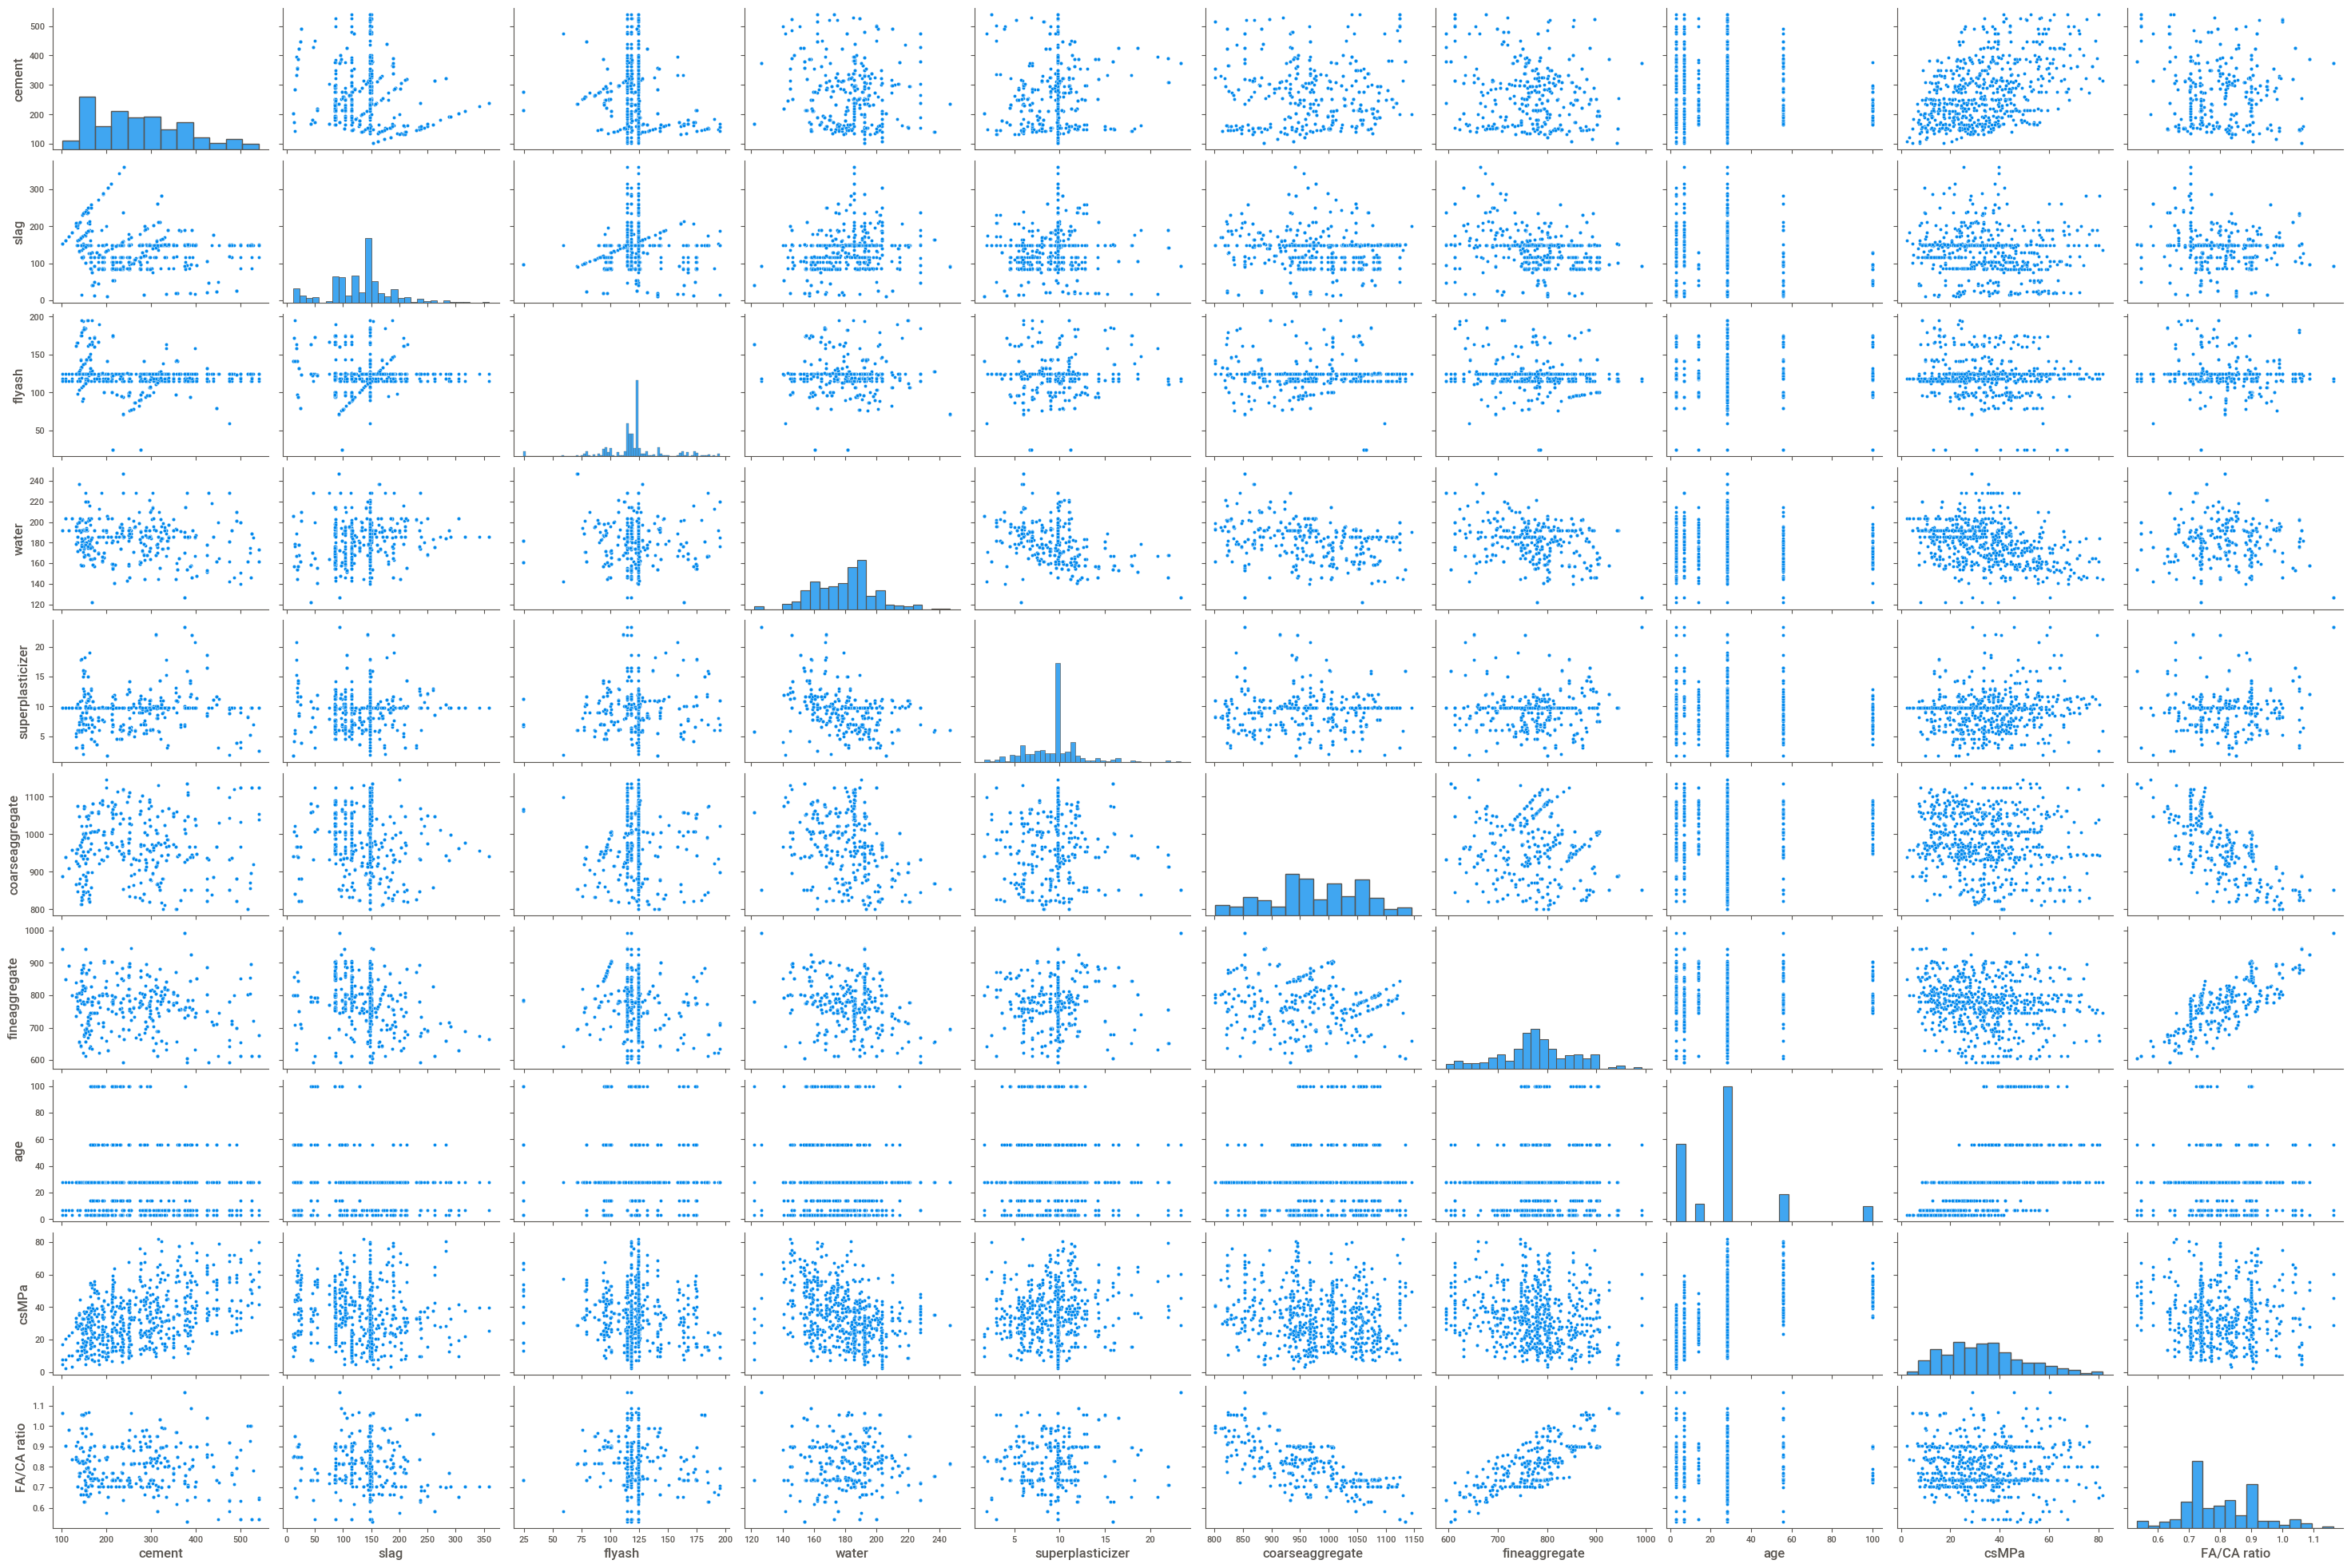

In [46]:
#13. Check for Linearity
sns.pairplot(data=concrete_train, height=2,aspect=1.5)

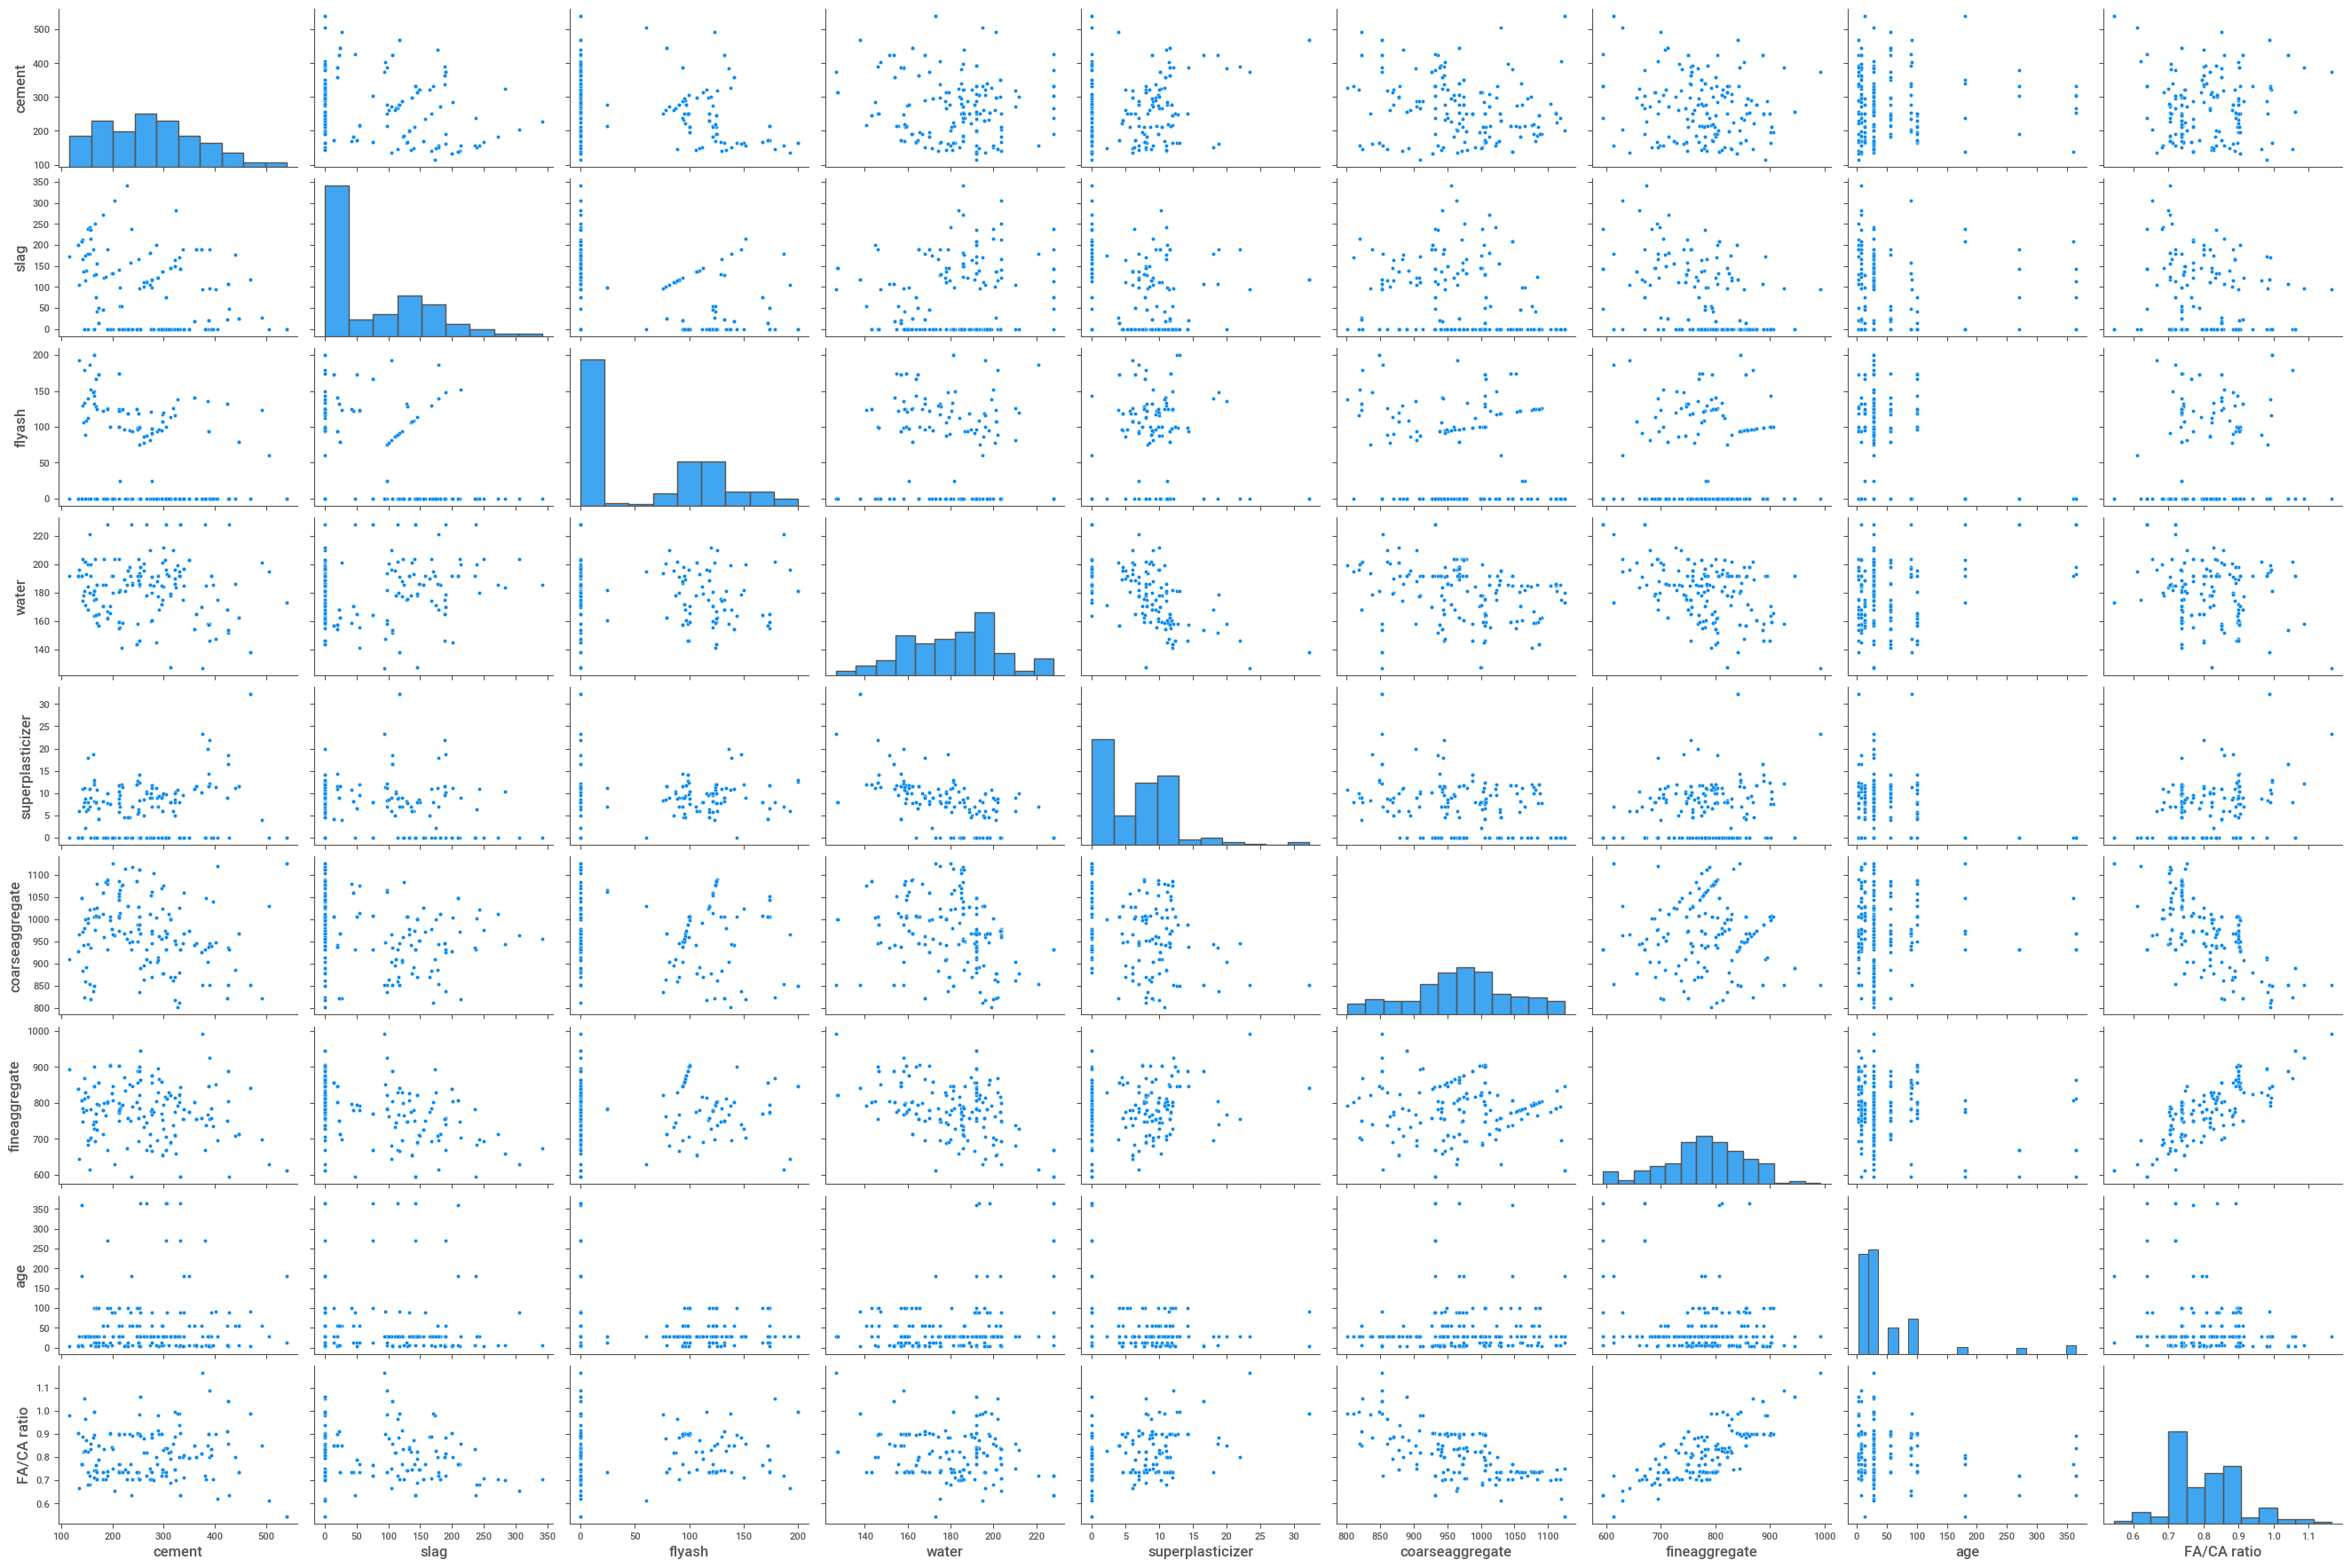

In [47]:
#13. Check for Linearity
sns.pairplot(data=concrete_test, height=2,aspect=1.5)

C:\Users\vbhak\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


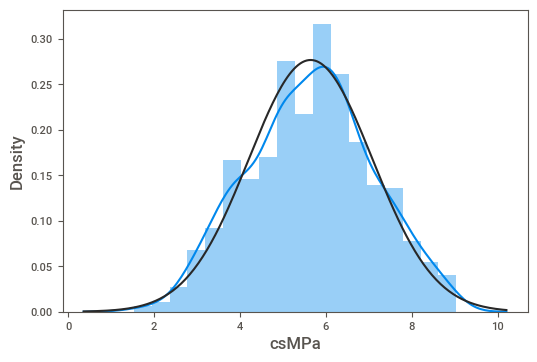

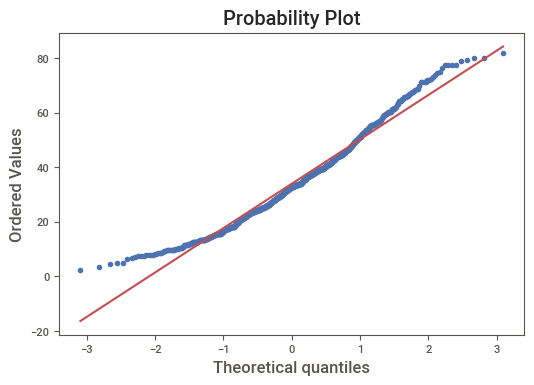

In [48]:
#concrete_train['csMPa']=np.sqrt(concrete_train['csMPa']
sns.distplot (np.sqrt(concrete_train['csMPa']),fit=norm);
fig = plt.figure()
res = stats.probplot(concrete_train['csMPa'], plot=plt)

C:\Users\vbhak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vbhak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vbhak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vbhak\anacond

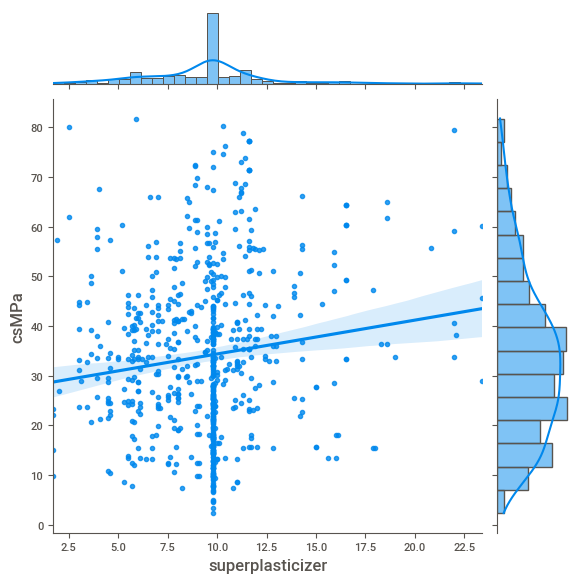

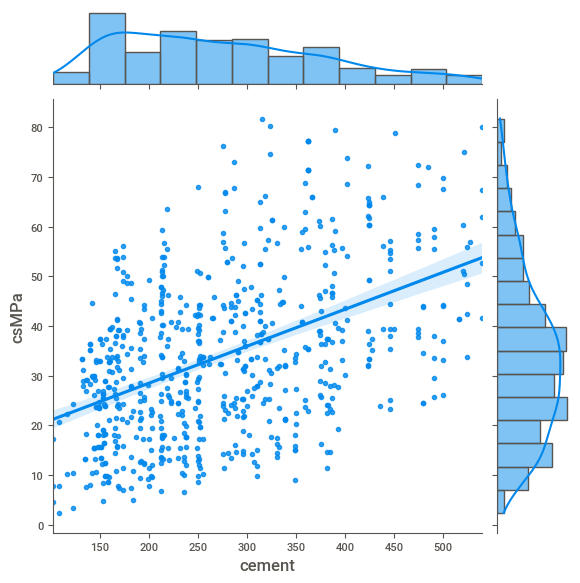

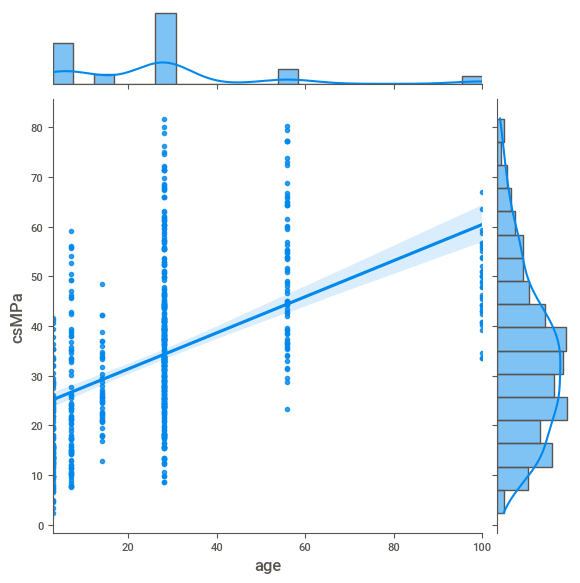

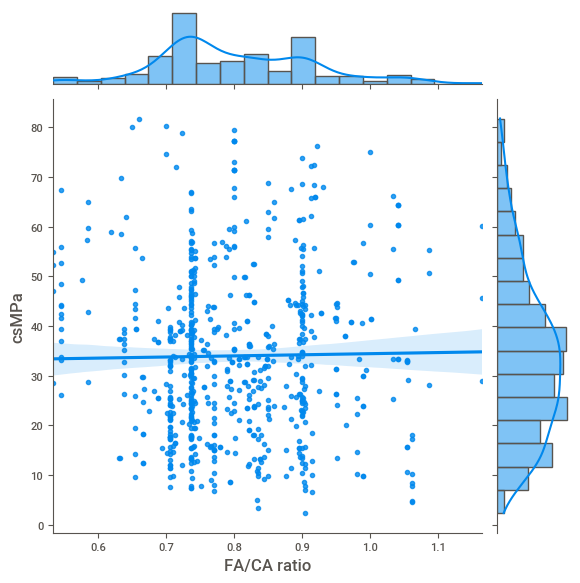

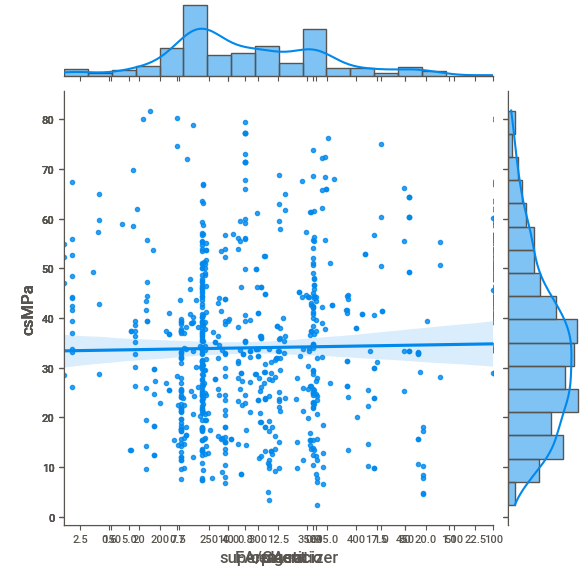

In [49]:
JG1 = sns.jointplot("superplasticizer", "csMPa", data=concrete_train, kind='reg')
JG2 = sns.jointplot("cement", "csMPa", data=concrete_train, kind='reg')
JG3 = sns.jointplot("age", "csMPa", data=concrete_train, kind='reg')
JG4 = sns.jointplot("FA/CA ratio", "csMPa", data=concrete_train, kind='reg')
#subplots migration
f = plt.figure()
for J in [JG1, JG2,JG3,JG4]:
    for A in J.fig.axes:
        f._axstack.add(f._make_key(A), A)

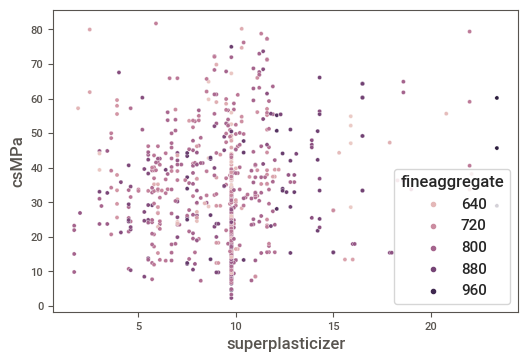

In [50]:
#Is there any relation between flyash and csMPa?
import seaborn as sns;
ax = sns.scatterplot(data=concrete_train, x="superplasticizer", y="csMPa",hue='fineaggregate')


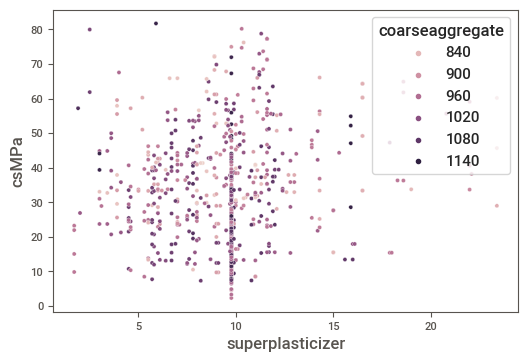

In [51]:
#Is there any relation between flyash and csMPa?
import seaborn as sns;
ax = sns.scatterplot(data=concrete_train, x="superplasticizer", y="csMPa",hue='coarseaggregate')

**Observation**
- when flyash is increased to 100-125 or around 25 coarse aggregates were found
- when flyash is increased to 100, fine aggregation is observed

- Fine aggregates generally consist of natural sand or crushed stone with most particles passing through a 3/8-inch sieve. 
- Coarse aggregates are any particles greater than 0.19 inch, 

In [52]:
#DRop 
concrete_train = concrete_train.drop(['fineaggregate', 'coarseaggregate'], axis = 1)
concrete_test = concrete_test.drop(['coarseaggregate', 'fineaggregate'], axis = 1)

In [53]:
concrete_train.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer', 'age', 'csMPa',
       'FA/CA ratio'],
      dtype='object')

In [54]:
#16.Prepare x, y variables
X=concrete_train.loc[:,concrete_train.columns!='csMPa']
print(X.head())
y=concrete_train['csMPa']
#or # Create a model to test using the following features
features_to_use = ['cement', 'slag','water','superplasticizer','flyash','age','FA/CA ratio']
concrete_test_X = concrete_test[features_to_use]


     cement       slag  flyash  water  superplasticizer  age  FA/CA ratio
Id                                                                       
995   158.6  148.90000   116.0  175.1              15.0   28     0.754956
507   424.0   22.00000   132.0  178.0               8.5   28     0.912409
334   275.1  115.69661   121.4  159.5               9.9    3     0.737946
848   252.0   97.00000    76.0  194.0               8.0   28     0.983234
294   168.9   42.20000   124.3  158.3              10.8    3     0.736677


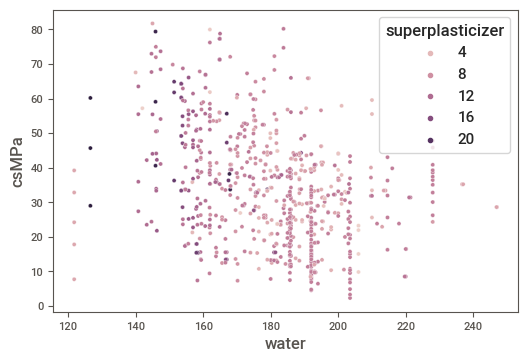

In [55]:
#Is there any relation between flyash and csMPa?
import seaborn as sns;
ax = sns.scatterplot(data=concrete_train, x="water", y="csMPa",hue='superplasticizer')

**Observations**
no relationship between fly ash and superplasticizer added

In [56]:
#concrete_train.dropna(subset=['slag', 'flyash'],inplace=True)

In [57]:
concrete_train.isnull().any()


cement              False
slag                False
flyash              False
water               False
superplasticizer    False
age                 False
csMPa               False
FA/CA ratio         False
dtype: bool

Feature: 0, Score: 0.09028
Feature: 1, Score: 0.06366
Feature: 2, Score: -0.00900
Feature: 3, Score: -0.25388
Feature: 4, Score: -0.28684
Feature: 5, Score: 0.40692
Feature: 6, Score: 6.31208


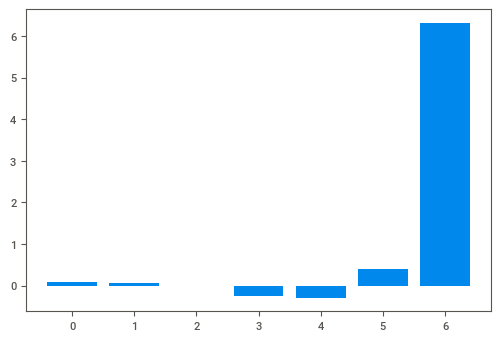

In [58]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
model=LinearRegression()
model.fit(X,y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [59]:
coeffecients = pd.DataFrame(model.coef_,features_to_use)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
cement,0.090280
slag,0.063661
water,-0.008997
superplasticizer,-0.253878
flyash,-0.286837
age,0.406925
FA/CA ratio,6.312083


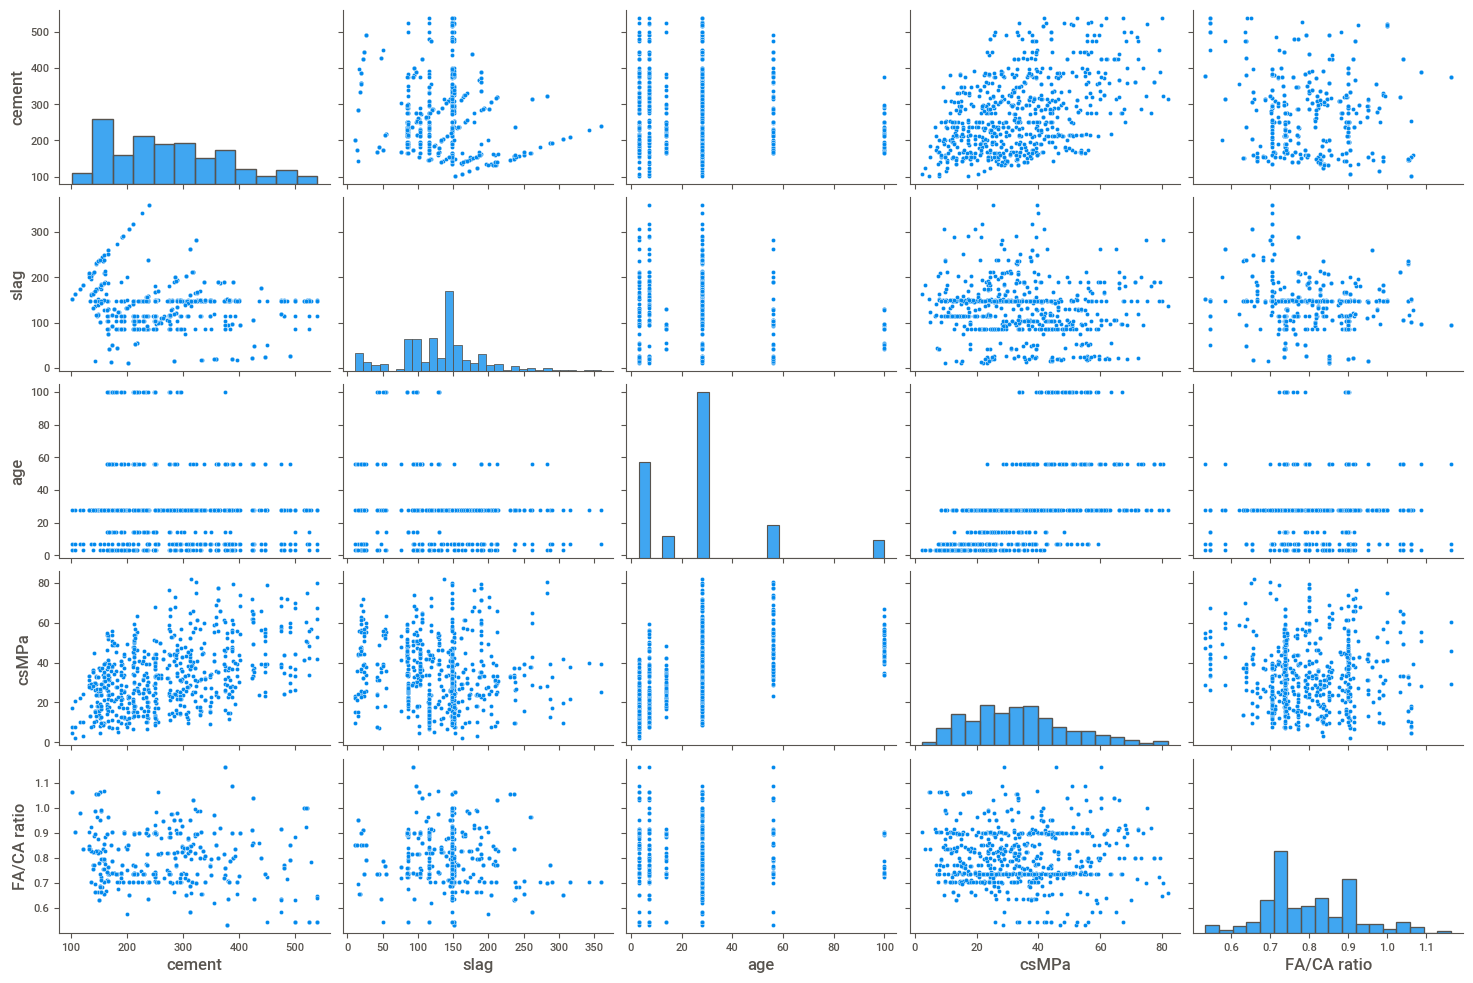

In [60]:
#DRop the negative importance, in this case, 
#means that removing a given feature from the model actually improves the performance, let's find out
concrete_train = concrete_train.drop(['flyash', 'water','superplasticizer'], axis = 1)
concrete_test = concrete_test.drop(['flyash', 'water','superplasticizer'], axis = 1)

#13. Check for Linearity
sns.pairplot(data=concrete_train,height=2,aspect=1.5)

In [61]:
#checking shape
print(concrete_train.shape)
print(concrete_test.shape)

(704, 5)
(206, 4)


In [62]:
#13. Check for Linearity after drop
#beijing_test = beijing_test.drop([ 'PRES', 'WSPM','datetime'], axis = 1)
#sns.pairplot(data=beijing_test,height=2,aspect=1.5, hue='wd') 

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y, test_size=0.30,random_state=0 )

In [64]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import numpy as np
 

from sklearn.model_selection import cross_val_score
 
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [65]:
#CV
for depth in range (1,10):
     tree_regressor=tree.DecisionTreeRegressor(max_depth=depth,random_state=1)
     if tree_regressor.fit(X,y).tree_.max_depth<depth:
         break
score=np.mean(cross_val_score(tree_regressor,X,y,scoring='neg_mean_squared_error', n_jobs=1))
print(depth, score)

9 -67.1234857483122


In [66]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics

pipeline_lr=Pipeline([('scaler1',StandardScaler()),
                     ('lr_regressor',LinearRegression())])
pipeline_rfc=Pipeline([('scaler2',StandardScaler()),
                     ('RFC_regressor',RandomForestRegressor(n_estimators=1000))])
pipeline_dt = Pipeline([('scaler3', StandardScaler()),
                      ('DT_regressor', DecisionTreeRegressor(splitter='best'))])
pipeline_Ada = Pipeline([('scaler4',MinMaxScaler()),
                     ('Adaboost_regressor',AdaBoostRegressor(random_state=0, n_estimators=10000,learning_rate=0.0001))])
pipelines = [pipeline_lr, pipeline_rfc, pipeline_dt,pipeline_Ada]
pipe_dict = {0: 'Linear Regression', 1: 'Random Forest', 2: 'Decision Tree',3:'AdaBoostRegression'}
for pipe in pipelines:
    pipe.fit(X_train, y_train)
for i,model in enumerate(pipelines):
    print("{} Test RMSE:{}".format(pipe_dict[i],model.score(X_val,y_val)))


Linear Regression Test RMSE:0.6671575405999084
Random Forest Test RMSE:0.8723957087463902
Decision Tree Test RMSE:0.7018273487347695
AdaBoostRegression Test RMSE:0.6904509036202098


In [67]:
test_pred = pipeline_lr.predict(concrete_test_X)
test_pred
#test_pred=np.power(test_pred,2)
test_pred_df= pd.DataFrame(test_pred)
def lr():  
    test_pred_df.columns = ['csMPa']
    head =test_pred_df.head()
    return head
lr()
print(test_pred_df.head())

        csMPa
0  209.943899
1   75.763779
2   84.562802
3   74.139370
4   35.079080


In [68]:
concrete_future_pred=pd.concat([concrete_test,test_pred_df.set_index(concrete_test.index)], axis=1)
concrete_future_pred

,cement,slag,age,FA/CA ratio,csMPa
Id,,,,,
31,266.0,114.0,365,0.718884,209.943899
109,362.6,189.0,7,0.800042,75.763779
136,389.9,189.0,28,0.800042,84.562802
88,362.6,189.0,3,0.800042,74.139370
918,145.0,0.0,28,1.054612,35.079080
...,...,...,...,...,...
482,446.0,24.0,56,0.736298,84.357765
545,255.0,0.0,28,1.062036,68.132424
110,286.3,200.9,7,0.800020,69.979230


In [69]:
concrete_future_pred.drop(['cement','slag','age','FA/CA ratio'], axis=1, inplace=True)
concrete_future_pred

,csMPa
Id,
31,209.943899
109,75.763779
136,84.562802
88,74.139370
918,35.079080
...,...
482,84.357765
545,68.132424
110,69.979230


In [70]:
concrete_future_pred.to_csv("submission_concrete_pred.csv",index=True, header=False)

In [71]:
concrete_future_pred.describe()

,csMPa
count,206.000000
mean,72.810366
std,34.166051
min,30.241588
25%,55.582157
50%,66.083395
75%,77.835104
max,216.972327
